## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('data/human_body_temperature.csv')

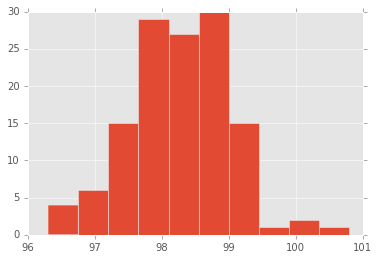

In [5]:
df.temperature.hist()

The body temperatures seem to be a bi-modal distribution. Presumably, the distribution represents two different populations. In this case,the two modes may represent the difference in genders. One way to determine this is to plot the distributions by gender. 

gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: temperature, dtype: object

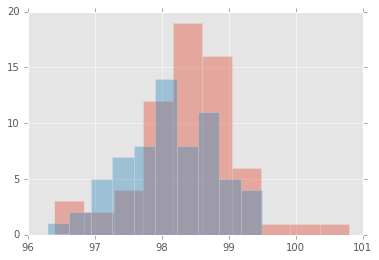

In [6]:
gender_df = df.groupby ('gender')
gender_df.temperature.hist(alpha = 0.4)

As can be seen above, grouping the data by genders yields two different normal distributions. 

Is the true population mean really 98.6 degrees F?
To answer this question, 
lets consider the Null hypothesis: True population mean = 98.6 degree F 
and the alternative hypothesis : True population mean <> 98.6 degree F
Further, lests assume null hypothesis is true. 
Now, To apply the z-test lets compute z-statistic of the sample mean:

In [11]:
import math as math
x = df.temperature.mean()
mu = 98.6
n = len(df.temperature)
s = df.temperature.std()
sigma = s/math.sqrt(n)
print("Sample Mean   = ", x)
print("Sample Size = ", n)
print("Sample Standard Deviation , s = ", s)
print("Estimated standard deviaition of sample distribution of sample mean: ", sigma)
print("Z-statistic for sample mean: ", ((x-mu)/sigma))

Sample Mean   =  98.24923076923078
Sample Size =  130
Sample Standard Deviation , s =  0.7331831580389454
Estimated standard deviaition of sample distribution of sample mean:  0.06430441683789101
Z-statistic for sample mean:  -5.454823292364079


Assuming null hypothesis is true, the probability of getting a sample mean of 98.25 is extremely low, since the sample mean is more than 5 standard deviations below the mean of the sample distribution of sample mean.This would mean the alternative hypothesis is true - The true population mean is not really 98.6 degree F

The Z-test is appropriate since the sample size is large.

But if we apply T-test, we have to figure the probability of the t-statistic given the null hypothesis.
The critical t value for a confidence level of 99.9% is +-3.39 from the t-distribution mean. Since the T-statistic falls outside this range the probability of randomly picking a sample with the t-statistic given the null hypothesis is less 0.1% and hence the null hypothesis can be rejected.

At what temperature should we consider someone's temperature to be "abnormal"?

Let us consider a confidence interval of 99% and estimate the population mean temperature from sample mean. The sample mean as computed above is 98.25. The standard deviation of the sample mean is 0.064

The probability that the sample mean (98.25) is three standard deviations away from the mean of the sample mean distributuion is 99.7%. This can also be stated as the probability that the population mean is with in 3 standard deviations from sample mean (98.25) . We have estimated the standard deviation of the sample mean distribution as 0.064. 

In [10]:
print ("The mean temperature is with in ",x-3*sigma, "and", x+3*sigma, "With a confidence interval of 99.7%")

The mean temperature is with in  98.05631751871711 and 98.44214401974445 With a confidence interval of 99.7%


So an individuals temperature can be considered abnormal if it lies outside of the above range with a type 1 error of 0.3%

Is there a significant difference between males and females in normal temperature?

To answer this question, let us assume the Null hypothesis that the difference between the gender means is 0. Now, assuming this null hypothesis is true lets compute the probability of getting specific sample mean diffrence from our samples. 

In [29]:
import math as m
x1=gender_df.temperature.mean().F - gender_df.temperature.mean().M
std1 = m.sqrt(gender_df.temperature.var().F + gender_df.temperature.var().M)
print ("The mean difference between genders: ", x1)
print ("The standard deviation: ", std1)

The mean difference between genders:  0.289230769231
The standard deviation:  1.0203105673500414


Lets compute the probability of getting the above mean difference given Null hypothesis is true. 

In [32]:
print ("Z-score : ", (0-x1)/std1)

Z-score :  -0.283473266362


The probability of getting the above sample mean differnce is 0.2% given the nul hypothesis is true, hence we can reject the Null hypothesis. Hence the alternative hypothesis that there is a significant differnce between male and female temperatures is true. 